In [1]:
import sys
import numpy as np

In [673]:
def get_index(l, x):
    idx = [i for i, j in enumerate(l) if x in j]
    if len(idx) == 1:
        return idx[0]
    elif len(idx) == 0:
        print("ファイル内に［{}］を確認できませんでした".format(x))
        sys.exit()
    else:
        print("ファイルの中身が正しくありません。［{}］を確認してください。".format(x))
        sys.exit()

    



with open("sample2.MSH", mode="r") as file:
    lines = file.read().splitlines()


node_row = get_index(lines, "NODE")
element_row = get_index(lines, "ELEMENT")

npm = element_row - node_row - 1

nem = get_index(lines, "LINE") - element_row - 1


print(npm, nem)

4706 4535


In [661]:
node_row

2

In [662]:
d = "\n".join(lines)
with open("sample.txt", mode="a") as file:
    file.write(d)

In [663]:
"""
    リナンバのアルゴリズム
"""

'\n    リナンバのアルゴリズム\n'

In [676]:
"""
    座標取得
    0: 接点番号
    1: x座標値
    2: y座標値
    
"""
nod = 4
element = np.zeros([nem, nod+1], dtype=np.int64)
x = np.zeros(npm, dtype=np.float64)
y = np.zeros(npm, dtype=np.float64)
node = np.zeros([npm, 4], dtype=np.float64)

for i, n in enumerate(range(node_row+1, node_row+npm+1, 1)):
    node[i, 0] = int(lines[n].split()[0])
    node[i, 1] = float(lines[n].split()[-2])
    node[i, 2] = float(lines[n].split()[-1])

node[:, 1] = np.round(node[:, 1] + np.abs(min(node[:, 1])), 4)
node[:, 2] = np.round(node[:, 2] + np.abs(min(node[:, 2])), 4)
node = np.array(node)
node = sorted(node, key=lambda x:(x[1]))
node = sorted(node, key=lambda x:(x[2]))
node = np.array(node)
for i in range(npm):
    node[i, 3] = i + 1

    
    
for i, n in enumerate(range(element_row+1, element_row+nem+1, 1)):
    sep = lines[n].split()
    element[i, 0] = int(sep[1]) # node_1
    element[i, 1] = int(sep[2]) # node_2
    element[i, 2] = int(sep[3]) # node_3
    if len(sep) != 5:
        element[i, 3] = int(sep[4]) # node_4
    elif len(sep) == 5:
        element[i, 3] = 0 # node_4
    element[i, 4] = int(sep[-1]) # section number
    


for i in range(len(element)):
    element[i, 0] = int(node[np.where(element[i, 0]==node[:,0]), 3][0][0])
    element[i, 1] = int(node[np.where(element[i, 1]==node[:,0]), 3][0][0])
    element[i, 2] = int(node[np.where(element[i, 2]==node[:,0]), 3][0][0])
    if element[i, 3] == 0:
        continue
    element[i, 3] = int(node[np.where(element[i, 3]==node[:,0]), 3][0][0]) 



In [653]:
i

4535

In [677]:
element

array([[ 289,  290,  434,  433,    6],
       [ 145,  146,  290,  289,    6],
       [   1,    2,  146,  145,    6],
       ...,
       [4271, 4272, 4367, 4366,    2],
       [4272, 4273, 4368, 4367,    1],
       [4177, 4178, 4273, 4272,    1]], dtype=int64)

In [648]:
a = node
a[:, 0] = 0
a[:, 3] = 0

In [649]:
aa = [",".join(str(i)) for i in a]
len(set(aa))

4706

In [650]:

print(len(a))

4706


In [666]:
for i in range(len(element)):
    if element[i][3] != 0:
        aa = np.zeros([4, 2], dtype=np.float64)
        n1=element[i,0]-1; aa[0, 0]=node[:, 1][n1]; aa[0, 1]=node[:, 2][n1]
        n2=element[i,1]-1; aa[1, 0]=node[:, 1][n2]; aa[1, 1]=node[:, 2][n2]
        n3=element[i,2]-1; aa[2, 0]=node[:, 1][n3]; aa[2, 1]=node[:, 2][n3]
        n4=element[i,3]-1; aa[3, 0]=node[:, 1][n4]; aa[3, 1]=node[:, 2][n4]
        #     print(aa)
        aa = np.array(aa)
        aa = sorted(aa, key=lambda x:(x[0]))
        aa = sorted(aa, key=lambda x:(x[1]))

        element[i, 0] = int(node[np.where((aa[2][0]==node[:,1]) & (aa[2][1]==node[:,2])), 3][0][0])
        element[i, 1] = int(node[np.where((aa[0][0]==node[:,1]) & (aa[0][1]==node[:,2])), 3][0][0])
        element[i, 2] = int(node[np.where((aa[1][0]==node[:,1]) & (aa[1][1]==node[:,2])), 3][0][0])
        element[i, 3] = int(node[np.where((aa[3][0]==node[:,1]) & (aa[3][1]==node[:,2])), 3][0][0])

    if element[i][3] == 0:
        print(element[i])
element = sorted(element.tolist(), key=lambda x:(x[1]))
element = np.array(element)

[3313 3314 3457    0    2]
[3702 3703 3798    0    2]
[3703 3799 3798    0    1]
[4702 4703 4705    0    1]
[4614 4615 4659    0    2]
[4643 4644 4702    0    1]
[3800 3801 3896    0    1]
[3797 3798 3893    0    2]
[3893 3989 3988    0    1]
[3798 3894 3893    0    1]
[3987 3988 4083    0    2]
[3991 3992 4086    0    1]
[4275 4276 4370    0    1]
[4366 4367 4460    0    2]
[4083 4178 4177    0    1]


In [598]:
element[3630:3635]

array([[3803, 3703, 3705, 3804,    1],
       [3801, 3703, 3803,    0,    1],
       [3801, 3703, 3703, 3801,    1],
       [3705, 3703, 3703, 3705,    1],
       [3804, 3705, 3707, 3805,    1]])

In [685]:
"""
    1要素を構成する接点の並びを確認および修正するプログラム
"""
# node_n = np.copy(node)
for i in range(len(element)):
    if element[i][3] != 0:
#         print(element[i])
        aa = np.zeros([4, 2], dtype=np.float64)
        n1=element[i,0]-1; aa[0, 0]=node[:, 1][n1]; aa[0, 1]=node[:, 2][n1]
        n2=element[i,1]-1; aa[1, 0]=node[:, 1][n2]; aa[1, 1]=node[:, 2][n2]
        n3=element[i,2]-1; aa[2, 0]=node[:, 1][n3]; aa[2, 1]=node[:, 2][n3]
        n4=element[i,3]-1; aa[3, 0]=node[:, 1][n4]; aa[3, 1]=node[:, 2][n4]
        
        
        aa = np.array(aa)
        aa = [list(i) for i in aa]

        y_max = sorted(aa, key=lambda x:(x[1]), reverse=True)[:2]
        y_min = sorted(aa, key=lambda x:(x[1]), reverse=False)[:2]
        x_max = sorted(aa, key=lambda x:(x[0]), reverse=True)[:2]
        x_min = sorted(aa, key=lambda x:(x[0]), reverse=False)[:2]
#         print(element[i])
#         print(aa)
#         print(y_max, y_min, x_max, x_min)
#         print("----")
        n_1  = [i for i in x_min if i in y_min][0]
        n_2  = [i for i in x_max if i in y_min][0]
        n_3  = [i for i in x_min if i in y_max][0]
        n_4  = [i for i in x_max if i in y_max][0]



#         element[i, 0] = int(node[np.where((aa[2][0]==node[:,1]) & (aa[2][1]==node[:,2])), 3][0][0])
#         element[i, 1] = int(node[np.where((aa[0][0]==node[:,1]) & (aa[0][1]==node[:,2])), 3][0][0])
#         element[i, 2] = int(node[np.where((aa[1][0]==node[:,1]) & (aa[1][1]==node[:,2])), 3][0][0])
#         element[i, 3] = int(node[np.where((aa[3][0]==node[:,1]) & (aa[3][1]==node[:,2])), 3][0][0])
        element[i, 0] = int(node[np.where((n_3[0]==node[:,1]) & (n_3[1]==node[:,2])), 3][0][0])
        element[i, 1] = int(node[np.where((n_1[0]==node[:,1]) & (n_1[1]==node[:,2])), 3][0][0])
        element[i, 2] = int(node[np.where((n_2[0]==node[:,1]) & (n_2[1]==node[:,2])), 3][0][0])
        element[i, 3] = int(node[np.where((n_4[0]==node[:,1]) & (n_4[1]==node[:,2])), 3][0][0])





    if element[i][3] == 0:

        n1=element[i,0]-1; x1=node[:, 1][n1]; y1=node[:, 2][n1]
        n2=element[i,1]-1; x2=node[:, 1][n2]; y2=node[:, 2][n2]
        n3=element[i,2]-1; x3=node[:, 1][n3]; y3=node[:, 2][n3]

        


In [606]:
print(element[i])
print(aa)
print(y_max, y_min, x_max, x_min)
print("----")

[4471 4377 4376 4470    1]
[[60.0, 19.4], [60.182, 19.0], [60.182, 19.0], [60.0, 19.4]]
[[60.0, 19.4], [60.0, 19.4]] [[60.182, 19.0], [60.182, 19.0]] [[60.182, 19.0], [60.182, 19.0]] [[60.0, 19.4], [60.0, 19.4]]
----


In [686]:
element

array([[ 145,    1,    2,  146,    6],
       [ 146,    2,    3,  147,    6],
       [ 147,    3,    4,  148,    6],
       ...,
       [4703, 4645, 4646, 4704,    1],
       [4702, 4703, 4705,    0,    1],
       [4705, 4703, 4704, 4706,    1]])

In [543]:
aa = np.array(aa)
aa = [list(i) for i in aa]
y_max = sorted(aa, key=lambda x:(x[1]), reverse=True)[:2]
y_min = sorted(aa, key=lambda x:(x[1]), reverse=False)[:2]
x_max = sorted(aa, key=lambda x:(x[0]), reverse=True)[:2]
x_min = sorted(aa, key=lambda x:(x[0]), reverse=False)[:2]


print(y_max)
print(y_min)
print(x_max)
print(x_min)

n_1  = [i for i in x_max if i in y_max][0]
n_2  = [i for i in x_max if i in y_min][0]
n_3  = [i for i in x_min if i in y_max][0]
n_4  = [i for i in x_min if i in y_min][0]

print("---")
print(n_1)
print(n_2)
print(n_3)
print(n_4)

[[62.5, 15.833], [62.917, 15.827]]
[[62.5, 15.35], [62.917, 15.35]]
[[62.917, 15.35], [62.917, 15.827]]
[[62.5, 15.35], [62.5, 15.833]]
---
[62.917, 15.827]
[62.917, 15.35]
[62.5, 15.833]
[62.5, 15.35]


[[62.917, 15.35], [62.917, 15.827]]

In [513]:
aa = np.array(aa)
sorted(list(set(list(aa[:, 1]))))

[15.35, 15.827, 15.833]

In [517]:
aa

array([[62.5  , 15.35 ],
       [62.917, 15.35 ],
       [62.917, 15.827],
       [62.5  , 15.833]])

In [518]:
aa[1,1]

15.35

In [678]:
element = sorted(element.tolist(), key=lambda x:(x[1]))

In [375]:
    
for i in range(len(element)):
    aa = sorted(element[i][:4])

    if 0 not in aa:
        element[i][0] = aa[2]
        element[i][1] = aa[0]
        element[i][2] = aa[1]
        element[i][3] = aa[3]
    elif 0 in aa:
        element[i][0] = aa[3]
        element[i][1] = aa[1]
        element[i][2] = aa[2]
        element[i][3] = aa[0]
        
element = sorted(element, key=lambda x:(x[1]))

In [449]:
element_n = np.copy(element)

In [670]:
# """
# test

# """
# element_n = np.copy(element)
# for i in range(len(element_n)):
#     if 0 not in element_n[i]:
#         aa = np.zeros([4, 2], dtype=np.float64)
#         n1=element_n[i,0]-1; aa[0, 0]=node[:, 1][n1]; aa[0, 1]=node[:, 2][n1]
#         n2=element_n[i,1]-1; aa[1, 0]=node[:, 1][n2]; aa[1, 1]=node[:, 2][n2]
#         n3=element_n[i,2]-1; aa[2, 0]=node[:, 1][n3]; aa[2, 1]=node[:, 2][n3]
#         n4=element_n[i,3]-1; aa[3, 0]=node[:, 1][n4]; aa[3, 1]=node[:, 2][n4]
#         aa = np.array(aa)
#         aa = sorted(aa, key=lambda x:(x[0]))
#         aa = sorted(aa, key=lambda x:(x[1]))
# #         aa = sorted(aa , key=lambda k: [k[1], k[0]])
#         print(aa)
#         print(element[i])
#         print(x1,x2, x3, x4)
#         print(y1, y2, y3, y4)
#         element[i, 0] = int(node[np.where((aa[2][0]==node[:,1]) & (aa[2][1]==node[:,2])), 3][0][0])
#         element[i, 1] = int(node[np.where((aa[0][0]==node[:,1]) & (aa[0][1]==node[:,2])), 3][0][0])
#         element[i, 2] = int(node[np.where((aa[1][0]==node[:,1]) & (aa[1][1]==node[:,2])), 3][0][0])
#         element[i, 3] = int(node[np.where((aa[3][0]==node[:,1]) & (aa[3][1]==node[:,2])), 3][0][0])
#         print(element[i])
#         print(x1,x2, x3, x4)
#         print(y1, y2, y3, y4)
#         print("-------")

In [681]:
element = np.array(element)

In [682]:
element

array([[   1,    2,  146,  145,    6],
       [   2,    3,  147,  146,    6],
       [   3,    4,  148,  147,    6],
       ...,
       [4645, 4646, 4704, 4703,    1],
       [4702, 4703, 4705,    0,    1],
       [4703, 4704, 4706, 4705,    1]])

In [377]:
"""
    1要素を構成する接点の並びを確認および修正するプログラム
"""
# node_n = np.copy(node)
for i in range(len(element)):
    if 0 not in element[i]:
        aa = np.zeros([4, 2], dtype=np.float64)
        n1=element[i,0]-1; aa[0, 0]=node[:, 1][n1]; aa[0, 1]=node[:, 2][n1]
        n2=element[i,1]-1; aa[1, 0]=node[:, 1][n2]; aa[1, 1]=node[:, 2][n2]
        n3=element[i,2]-1; aa[2, 0]=node[:, 1][n3]; aa[2, 1]=node[:, 2][n3]
        n4=element[i,3]-1; aa[3, 0]=node[:, 1][n4]; aa[3, 1]=node[:, 2][n4]
#         print(aa)
        aa = np.array(aa)

#         aa = sorted(aa, key=lambda x:(x[0]))
#         aa = sorted(aa, key=lambda x:(x[1]))
#         print(aa)
#         print("----")

#         node[:, 1][n1] = aa[2][0]
#         node[:, 1][n2] = aa[0][0]
#         node[:, 1][n3] = aa[1][0]
#         node[:, 1][n4] = aa[3][0]

#         node[:, 2][n1] = aa[2][1]
#         node[:, 2][n2] = aa[0][1]
#         node[:, 2][n3] = aa[1][1]
#         node[:, 2][n4] = aa[3][1]

#         n1=element[i,0]-1; x1=node[:, 1][n1]; y1=node[:, 2][n1]
#         n2=element[i,1]-1; x2=node[:, 1][n2]; y2=node[:, 2][n2]
#         n3=element[i,2]-1; x3=node[:, 1][n3]; y3=node[:, 2][n3]
#         n4=element[i,3]-1; x4=node[:, 1][n4]; y4=node[:, 2][n4]        

#         if x1 > x3 or x1 > x4:
#             print("a", element[i])
#             print(x1, x2, x3, x4)
#             print(y1, y2, y3, y4)
# #             node[:, 1][n1], node[:, 1][n4] = node[:, 1][n4], node[:, 1][n1]
# #             node[:, 2][n1], node[:, 2][n4] = node[:, 2][n4], node[:, 2][n1]
#         elif x2 > x3 or x2 > x4:
#             print("b", element[i])
#             print(x1, x2, x3, x4)
#             print(y1, y2, y3, y4)
#         elif y1 < y2 or y1 < y3:
#             print("c")
#         elif y4 < y2 or y4 < y3:
#             print("d")
#         else:
#             print("No problem", end=" ")

#         if not y1 > y2:
#             node[:, 1][n1], node[:, 1][n2] = node[:, 1][n2], node[:, 1][n1]
#             node[:, 2][n1], node[:, 2][n2] = node[:, 2][n2], node[:, 2][n1]

#         elif not y1 > y3:
#             node[:, 1][n3], node[:, 1][n1] = node[:, 1][n1], node[:, 1][n3]
#             node[:, 2][n3], node[:, 2][n1] = node[:, 2][n1], node[:, 2][n3]
#             print("c")
#         elif not x3 > x1:
#             node[:, 1][n3], node[:, 1][n1] = node[:, 1][n1], node[:, 1][n3]
#             node[:, 2][n3], node[:, 2][n1] = node[:, 2][n1], node[:, 2][n3]
#             print("b")
#         elif not x4 > x1:
#             node[:, 1][n1], node[:, 1][n4] = node[:, 1][n4], node[:, 1][n1]
#             node[:, 2][n1], node[:, 2][n4] = node[:, 2][n4], node[:, 2][n1]
#             print("a")

    if 0 in element[i]:
        n1=element[i,0]-1; x1=node[:, 1][n1]; y1=node[:, 2][n1]
        n2=element[i,1]-1; x2=node[:, 1][n2]; y2=node[:, 2][n2]
        n3=element[i,2]-1; x3=node[:, 1][n3]; y3=node[:, 2][n3]

        


TypeError: list indices must be integers or slices, not tuple

In [232]:
aa

[3705, 3706, 3707, 3708]

* displacement
[3313 3314 3457    0    2]
[3702 3703 3798    0    2]
[3797 3798 3893    0    2]
[3703 3799 3798    0    1]
[3800 3801 3896    0    1]
[3798 3894 3893    0    1]
[3987 3988 4083    0    2]
[3893 3989 3988    0    1]
[3991 3992 4086    0    1]
[4083 4178 4177    0    1]
[4275 4276 4370    0    1]
[4366 4367 4460    0    2]
[4614 4615 4659    0    2]
[4643 4644 4702    0    1]
[4702 4703 4705    0    1]


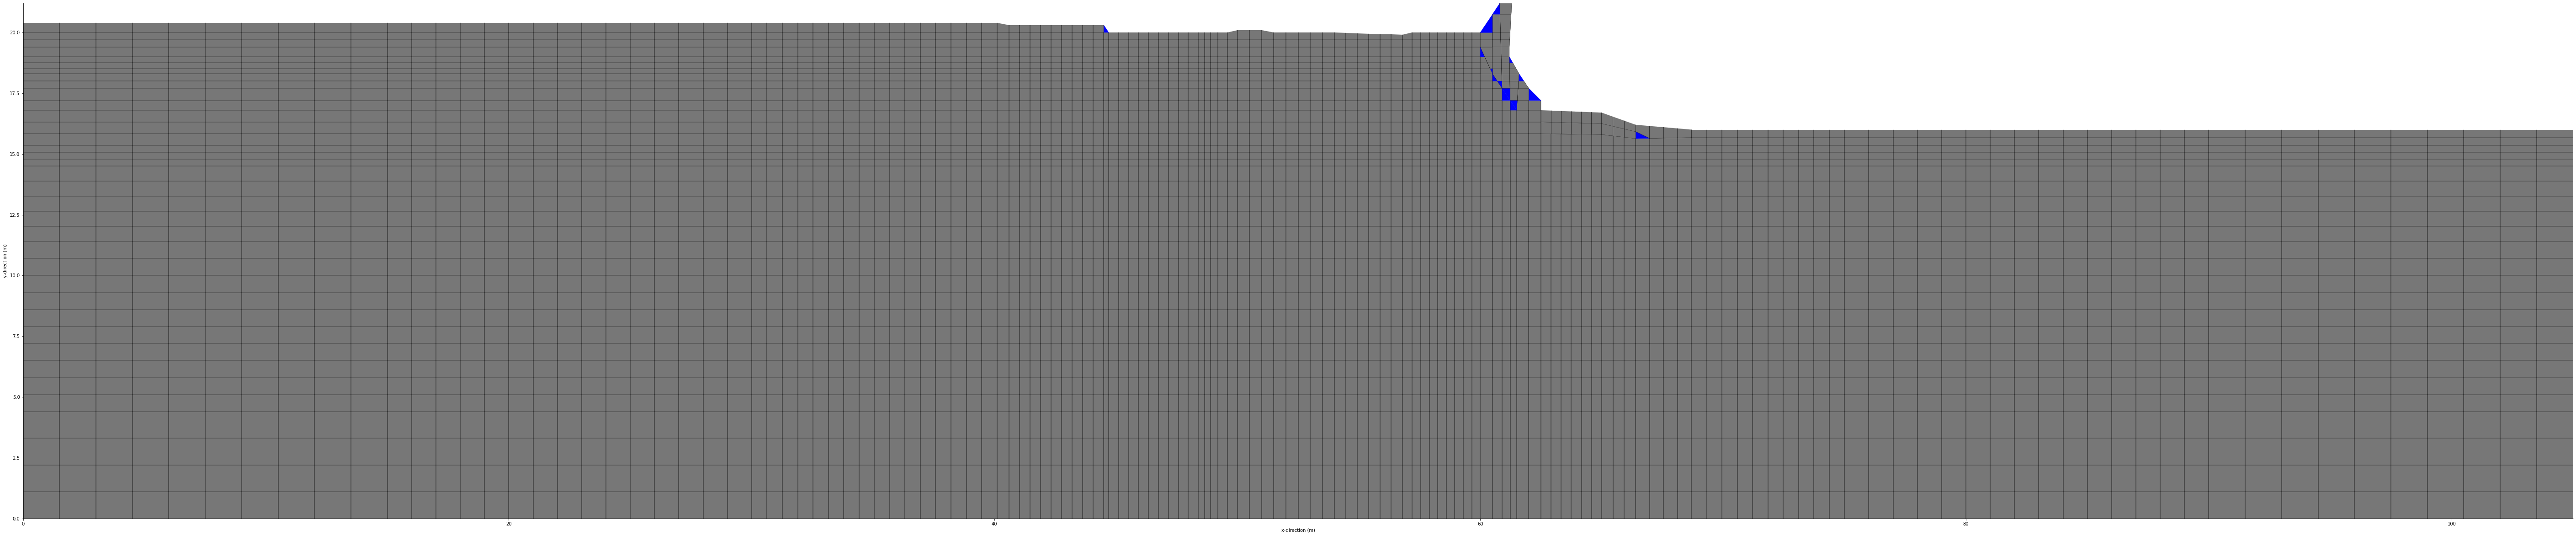

In [687]:

import matplotlib.pyplot as plt
xmin = 0
xmax = max(node[:, 1])
ymin = 0
ymax = max(node[:, 2])

fig = plt.figure(figsize=(100, 100))
ax1=plt.subplot(111)
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])
ax1.set_xlabel('x-direction (m)')
ax1.set_ylabel('y-direction (m)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
aspect = (ymax-ymin)/(xmax-xmin)*(ax1.get_xlim()[1] - ax1.get_xlim()[0]) / (ax1.get_ylim()[1] - ax1.get_ylim()[0])
ax1.set_aspect(aspect)


# displacement
print('* displacement')

\
for i in range(len(element)):
    if element[i][3] != 0:
        n1=element[i,0]-1; x1=node[:, 1][n1]; y1=node[:, 2][n1]
        n2=element[i,1]-1; x2=node[:, 1][n2]; y2=node[:, 2][n2]
        n3=element[i,2]-1; x3=node[:, 1][n3]; y3=node[:, 2][n3]
        n4=element[i,3]-1; x4=node[:, 1][n4]; y4=node[:, 2][n4]
        if x1 > x3 or x1 > x4:
            print("a", element[i])
            ax1.plot([x1,x2,x3,x4],[y1,y2,y3,y4],color='red',lw=0.4)
            ax1.fill([x1,x2,x3,x4],[y1,y2,y3,y4],facecolor='red',edgecolor='red',lw=0.1)
            break
        elif x2 > x3 or x2 > x4:
            print("b", element[i])
            ax1.plot([x1,x2,x3,x4],[y1,y2,y3,y4],color='red',lw=0.4)
            ax1.fill([x1,x2,x3,x4],[y1,y2,y3,y4],facecolor='red',edgecolor='red',lw=0.1)
        elif y1 < y2 or y1 < y3:
            print("c", element[i])
            ax1.plot([x1,x2,x3,x4],[y1,y2,y3,y4],color='red',lw=0.4)
            ax1.fill([x1,x2,x3,x4],[y1,y2,y3,y4],facecolor='red',edgecolor='red',lw=0.1)
        elif y4 < y2 or y4 < y3:
            print("d", element[i])
            ax1.plot([x1,x2,x3,x4],[y1,y2,y3,y4],color='red',lw=0.4) 
            ax1.fill([x1,x2,x3,x4],[y1,y2,y3,y4],facecolor='red',edgecolor='red',lw=0.1)
        else:
            ax1.plot([x1,x2,x3,x4],[y1,y2,y3,y4],color='k',lw=0.4)
            ax1.fill([x1,x2,x3,x4],[y1,y2,y3,y4],facecolor='#777777',edgecolor='#777777',lw=0.1)

    if element[i][3] == 0:
        n1=element[i,0]-1; x1=node[:, 1][n1]; y1=node[:, 2][n1]
        n2=element[i,1]-1; x2=node[:, 1][n2]; y2=node[:, 2][n2]
        n3=element[i,2]-1; x3=node[:, 1][n3]; y3=node[:, 2][n3]
        ax1.plot([x1,x2,x3],[y1,y2,y3],color='blue',lw=0.5)
        ax1.fill([x1,x2,x3],[y1,y2,y3],facecolor='blue',edgecolor='blue',lw=0.1)
        print(element[i])

        
plt.savefig("a.png")

In [356]:
import pandas as pd
df = pd.DataFrame(element)
df.to_csv("element_ori.csv", index=None, header=None)

In [127]:
"""
    2Dyouso.dat作成
"""

q_1 = int(input("ARE YOU CALCULATE ONLY SEEPAGE?\n ONLY SEEPAGE FLOW=1  +DEFORMATION ANALYSIS=2  +NO=0"))

q_2 = int(input("ARE YOU CONSIDER JOINT ELEMENT?\n YES=1  NO=0"))#5
q_3 = int(input("ARE YOU CONSIDER EDGE CONDITION?\n YES=1  NO=0")) #7
q_4 = int(input("ARE YOU CONSIDER BEAM ELEMENT?\n BEAM ONLY=1  BEAM & JOINT=2  NO=0"))#8
q_5 = int(input("   ARE YOU CONSIDER LOADING?\n YES(INCREASE LOAD)=1  YES(CONSTANT LOAD )=2  NO=0"))#4
q_6 = int(input("ARE YOU CONSIDER WATER?\n YES=1  NO=0"))#6

ARE YOU CALCULATE ONLY SEEPAGE?
 ONLY SEEPAGE FLOW=1  +DEFORMATION ANALYSIS=2  +NO=0 0
ARE YOU CONSIDER JOINT ELEMENT?
 YES=1  NO=0 1
ARE YOU CONSIDER EDGE CONDITION?
 YES=1  NO=0 1
ARE YOU CONSIDER BEAM ELEMENT?
 BEAM ONLY=1  BEAM & JOINT=2  NO=0 2
   ARE YOU CONSIDER LOADING?
 YES(INCREASE LOAD)=1  YES(CONSTANT LOAD )=2  NO=0 1
ARE YOU CONSIDER WATER?
 YES=1  NO=0 0


In [688]:
file = open("2Dyouso.dat", "w", encoding='CP932')


con_1 = [int(node_n[i, 2]) for i in range(npm) if node_n[i,1] == min(node_n[:, 1])]
con_2 = [int(node_n[i, 2]) for i in range(npm) if node_n[i,0] == min(node_n[:, 0]) or node_n[i,0] == max(node_n[:, 0])]
con_2 = [i for i in con_2 if i not in con_1]

con_1 = sorted(con_1)
con_2 = sorted(con_2)


kousoku = len(con_1) * 2 + len(con_2)
jiban = max(element[:, 4])

file.write(str(npm).rjust(5) + str(nem).rjust(5) + str(kousoku).rjust(5) +  str(jiban).rjust(5) +  "0".rjust(5) +  "0".rjust(5)+"\n")


file.write("    0    0\n")
file.write("    0    0\n")
file.write("    0    0    0    0    0\n")
file.write("    0 1000\n")
file.write("    0    0    0\n")
file.write("E1000\n")

file.write("    3    1    1    {a}    {b}    {c}    {d}    {e}    0    0\n".format(a=q_5, b=q_2, c=q_6, d=q_3, e=q_4)) #<---入力の数字によって変更
file.write("    0    0    0    0    0    0    0    0    0    0\n")
file.write("    0    0    0    0    0    0    0    0    0    0\n")
file.write("    1.0d-4   1.0d-10    1.0d-2    1.0d-6    1.0d10    1.0d-7   0.0d+0    1.0d+0    2\n")
file.write("    2.0d-3 2302.0d-3    0.0d+0    1.4d+0    1.0d-0    1.0d-1\n")
file.write("    1.0d-8         0\n")
file.write("    1  1        9.1000000000        0.0005000000      -86.0000000000       33.7100000000\n")
file.write("    1  2        9.1000000000        0.0005000000      -86.0000000000       33.7100000000\n")
file.write("E   1  3        0.0000000000        0.0000000000        0.0000000000        1.2000000000\n")
file.write("  1  2  2  0  0  0  0  8  0  0  0  1 -2\n")
file.write("E    1    10000.00000        0.49999   0.00000    0.0000    50000.00000   0.00000\n")


for i in range(len(element_n)):
    if i+1 != len(element_n):
        file.write(str(i+1).rjust(6) + str(element_n[i][0]).rjust(5) + str(element_n[i][1]).rjust(5) + str(element_n[i][2]).rjust(5) + str(element_n[i][3]).rjust(5) + str(element_n[i][4]).rjust(5) + "\n")
    else:
        file.write("E" +str(i+1).rjust(5) + str(element_n[i][0]).rjust(5) + str(element_n[i][1]).rjust(5) + str(element_n[i][2]).rjust(5) + str(element_n[i][3]).rjust(5) + str(element_n[i][4]).rjust(5) + "\n")
    
for i in range(len(node_n)):
    if i+1 != len(node_n):
        file.write(str(i+1).rjust(6) + f"{node_n[i, 1]:15.05f}" + f"{node_n[i, 2]:15.05f}" + "\n")
    else:
        file.write("E" + str(i+1).rjust(5) + f"{node_n[i, 1]:15.05f}" + f"{node_n[i, 2]:15.05f}" + "\n")

con_1 = [int(node_n[i, 3]) for i in range(npm) if node_n[i,1] == min(node_n[:, 1])]
con_2 = [int(node_n[i, 3]) for i in range(npm) if node_n[i,0] == min(node_n[:, 0]) or node_n[i,0] == max(node_n[:, 0])]
con_2 = [i for i in con_2 if i not in con_1]

con_1 = sorted(con_1)
con_2 = sorted(con_2)

for i in range(len(con_1)):
    file.write(str(con_1[i]).rjust(6) + "    1    1" + "\n")

for i in range(len(con_2)):
    if i+1 != len(con_2):
        file.write(str(con_2[i]).rjust(6) + "    1    0" + "\n")
    else:
        file.write("E" + str(con_2[i]).rjust(5) + "    1    0" + "\n")
        
        
if q_2 == 1:
    file.write(dummy_text["joint"])
    
if q_3 == 1:
    file.write(dummy_text["edge"])

if q_4 == 1:
    file.write(dummy_text["beam"])
    
if q_4 == 2:
    file.write(dummy_text["beam"])
    file.write(dummy_text["beam_joint"])
file.close()

In [129]:
dummy_text = {"edge":
"""     1   0.000d0   0.000d0     1.00000d-5
E    2   0.000d0   0.000d0    1.00000d+10
     1  676  817    1
E    2  701  842    1
""",
              "beam":
"""E    1  1.000d+5  2.000d-1  2.000d+2  1.000d+2  1.000d-1
     1 7702 7703    1      
E    1 7703 7704    1      
  7702        0.00000        0.00000
  7703        0.00000        0.00000
E 7704        0.00000        0.00000
  7702    0    0    0            
  7703    0    0    0            
E 7704    0    0    0            
""",
              "joint":
"""E    1  30.00000  30.00000       20.00000   0.00000
     1   92   93   64   58    1      0.00000         0.000000000000000E+00         0.000000000000000E+00    0
E    2   92   93   64   58    1      0.00000         0.000000000000000E+00         0.000000000000000E+00    0
""",
              "beam_joint":
"""E    1  30.00000  30.00000       20.00000  17.50000
     1 1874 1875 7702 7703    1      0.00000         0.000000000000000E+00         0.000000000000000E+00    1
E    2 1874 1875 7703 7704    1      0.00000         0.000000000000000E+00         0.000000000000000E+00    1
""",
              "loading":
"""     1        0.00000       -1.00000
     2        0.00000       -1.00000
E    3        0.00000       -1.00000
     1    2
E    2    3
     1        0.00000       -1.00000
     2        0.00000       -1.00000
E    3        0.00000       -1.00000
     1    2
E    2    3
     1        0.00000       -1.00000
     2        0.00000       -1.00000
E    3        0.00000       -1.00000
""",
              "water":
"""                   ---Sis---                     ---Sir--- 
    1   0.32700   0.00000
                    ---Se---                     ---Pres--- 
""",
              "seepage":
"""    1    0    0    0    0    0    0    0    0    0
    1.0d-0
E   1  3.600d-4    1.2d-4   0.00000   0.34800   0.00000   5.22000   5.67800
   774        0.00000    5     0.000
   775        0.00000    1     0.000
   776        0.00000    1     0.000
   777        0.00000    0     0.000
E  778        0.00000    0     0.000
        0.00000     0
"""
             }
